<a href="https://colab.research.google.com/github/Varsha-R/Deep-Learning/blob/main/Intro_to_DL_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

4422102/4422102 [==============================] - 0s 0us/step


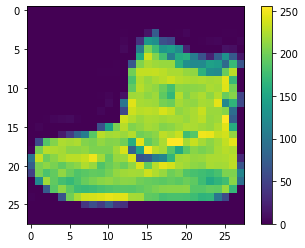

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=2018)
print(len(train_images), len(val_images), len(test_images))

48000 12000 10000


In [4]:
# Scaling the data
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

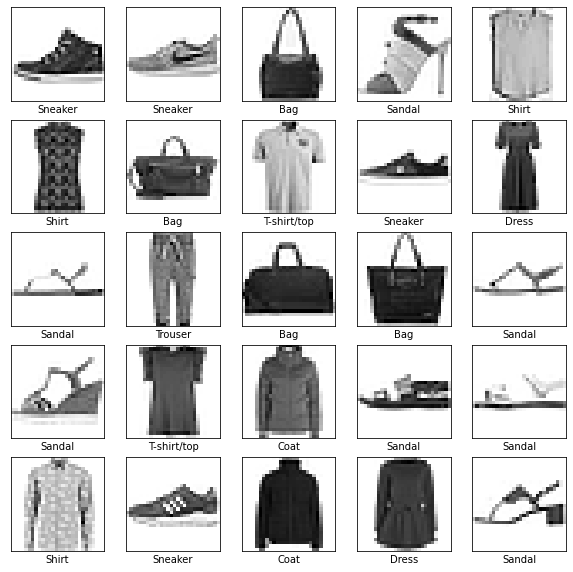

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# Reshaping images into equal dimensions
train_images = train_images.reshape(len(train_images),28,28,1)
val_images = val_images.reshape(len(val_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

# Reusable stuff

In [14]:
test_loss = []
test_accuracy = []
x_Ax = []

In [9]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

# TASK 1

## VARIATION 1 - 1 convolutional layer + 1 dense layer

In [10]:
model = Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.4062 - accuracy: 0.8551 - val_loss: 0.2919 - val_accuracy: 0.8978
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2706 - accuracy: 0.9021 - val_loss: 0.2700 - val_accuracy: 0.9038
Epoch 3/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2241 - accuracy: 0.9172 - val_loss: 0.2418 - val_accuracy: 0.9135
Epoch 4/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1924 - accuracy: 0.9283 - val_loss: 0.2400 - val_accuracy: 0.9160
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1635 - accuracy: 0.9394 - val_loss: 0.2513 - val_accuracy: 0.9145
Epoch 6/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1393 - accuracy: 0.9482 - val_loss: 0.2542 - val_accuracy: 0.9154
Epoch 7/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1198 - accuracy: 0.9559 - val_loss: 0.2552 -

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 28, 28, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 14, 14, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (32, 6272)                0         
                                                                 
 dense (Dense)               (32, 128)                 802944    
                                                                 
 dense_1 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [12]:
plot_accuracy_and_loss(train_model)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('1_cnn_layer')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34606871008872986
Test accuracy: 0.9068999886512756


## VARIATION 2 - 4 convolutional layers + 1 dense layer

In [16]:
model = Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 67s 44ms/step - loss: 0.5839 - accuracy: 0.7839 - val_loss: 0.4142 - val_accuracy: 0.8511
Epoch 2/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.3617 - accuracy: 0.8664 - val_loss: 0.3239 - val_accuracy: 0.8823
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3124 - accuracy: 0.8856 - val_loss: 0.3312 - val_accuracy: 0.8805
Epoch 4/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2810 - accuracy: 0.8951 - val_loss: 0.2829 - val_accuracy: 0.8967
Epoch 5/10
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2602 - accuracy: 0.9044 - val_loss: 0.2673 - val_accuracy: 0.9016
Epoch 6/10
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2382 - accuracy: 0.9109 - val_loss: 0.2679 - val_accuracy: 0.9010
Epoch 7/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2219 - accuracy: 0.9169 - val_loss: 0.2797 -

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (32, 28, 28, 32)          320       
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 14, 14, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 14, 14, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 7, 7, 32)           0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (32, 7, 7, 32)            9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 3, 3, 32)          

In [18]:
plot_accuracy_and_loss(train_model)

In [19]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('4_cnn_layers')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2686891257762909
Test accuracy: 0.9047999978065491


## VARIATION 3 - 10 convolutional layers + 1 dense layer

In [23]:
model = Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 68s 45ms/step - loss: 1.0733 - accuracy: 0.5661 - val_loss: 0.8214 - val_accuracy: 0.6755
Epoch 2/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.6708 - accuracy: 0.7449 - val_loss: 0.5799 - val_accuracy: 0.7834
Epoch 3/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.5461 - accuracy: 0.7947 - val_loss: 0.5310 - val_accuracy: 0.8048
Epoch 4/10
1500/1500 [==============================] - 68s 45ms/step - loss: 0.4809 - accuracy: 0.8187 - val_loss: 0.4754 - val_accuracy: 0.8317
Epoch 5/10
1500/1500 [==============================] - 69s 46ms/step - loss: 0.4286 - accuracy: 0.8466 - val_loss: 0.4092 - val_accuracy: 0.8598
Epoch 6/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.3883 - accuracy: 0.8638 - val_loss: 0.3704 - val_accuracy: 0.8748
Epoch 7/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.3645 - accuracy: 0.8725 - val_loss: 0.3574 -

In [24]:
plot_accuracy_and_loss(train_model)

In [25]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('10_cnn_layers')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33958083391189575
Test accuracy: 0.879800021648407


# Comparison graphs for task 1

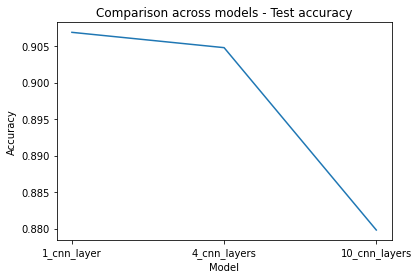

In [27]:
plt.plot(x_Ax, test_accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison across models - Test accuracy')
plt.show()

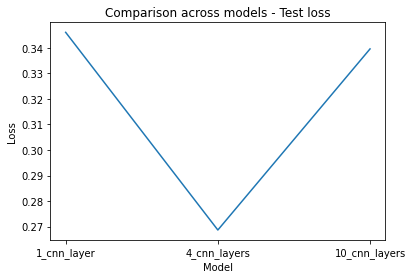

In [28]:
plt.plot(x_Ax, test_loss)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Comparison across models - Test loss')
plt.show()

# Task 2

In [29]:
test_loss = []
test_accuracy = []
x_Ax = []

## VARIATION 1 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 16 filters; kernel size 3

Pooling layer - pool size 2

Dense layer - 16 units

In [30]:
model = Sequential([
  layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 61s 40ms/step - loss: 0.6669 - accuracy: 0.7532 - val_loss: 0.4609 - val_accuracy: 0.8323
Epoch 2/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.4184 - accuracy: 0.8485 - val_loss: 0.3823 - val_accuracy: 0.8637
Epoch 3/10
1500/1500 [==============================] - 53s 36ms/step - loss: 0.3677 - accuracy: 0.8660 - val_loss: 0.3342 - val_accuracy: 0.8813
Epoch 4/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.3401 - accuracy: 0.8764 - val_loss: 0.3343 - val_accuracy: 0.8789
Epoch 5/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3215 - accuracy: 0.8823 - val_loss: 0.3342 - val_accuracy: 0.8813
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3058 - accuracy: 0.8882 - val_loss: 0.3137 - val_accuracy: 0.8897
Epoch 7/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2929 - accuracy: 0.8932 - val_loss: 0.3074 -

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (32, 28, 28, 16)          160       
                                                                 
 max_pooling2d_34 (MaxPoolin  (32, 14, 14, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (32, 14, 14, 16)          2320      
                                                                 
 max_pooling2d_35 (MaxPoolin  (32, 7, 7, 16)           0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (32, 7, 7, 16)            2320      
                                                                 
 max_pooling2d_36 (MaxPoolin  (32, 3, 3, 16)          

In [32]:
plot_accuracy_and_loss(train_model)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [33]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('16_filters_units')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30525127053260803
Test accuracy: 0.8885999917984009


## VARIATION 2 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 32 filters; kernel size 3

Pooling layer - pool size 2

Dense layer - 32 units

In [35]:
model = Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.5463 - accuracy: 0.8033 - val_loss: 0.3867 - val_accuracy: 0.8608
Epoch 2/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3567 - accuracy: 0.8698 - val_loss: 0.3141 - val_accuracy: 0.8851
Epoch 3/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3035 - accuracy: 0.8888 - val_loss: 0.2800 - val_accuracy: 0.9003
Epoch 4/10
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2766 - accuracy: 0.8983 - val_loss: 0.2784 - val_accuracy: 0.8996
Epoch 5/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2531 - accuracy: 0.9073 - val_loss: 0.2676 - val_accuracy: 0.9041
Epoch 6/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2356 - accuracy: 0.9121 - val_loss: 0.2528 - val_accuracy: 0.9102
Epoch 7/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2206 - accuracy: 0.9179 - val_loss: 0.2434 -

In [36]:
plot_accuracy_and_loss(train_model)

In [37]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('32_filters_units')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28416869044303894
Test accuracy: 0.902400016784668


## VARIATION 3 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 48 filters; kernel size 3

Pooling layer - pool size 2

Dense layer - 48 units

In [38]:
model = Sequential([
  layers.Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(48, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 99s 65ms/step - loss: 0.5137 - accuracy: 0.8146 - val_loss: 0.3666 - val_accuracy: 0.8702
Epoch 2/10
1500/1500 [==============================] - 103s 68ms/step - loss: 0.3254 - accuracy: 0.8807 - val_loss: 0.3039 - val_accuracy: 0.8906
Epoch 3/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.2737 - accuracy: 0.8988 - val_loss: 0.2707 - val_accuracy: 0.9058
Epoch 4/10
1500/1500 [==============================] - 103s 69ms/step - loss: 0.2442 - accuracy: 0.9102 - val_loss: 0.2620 - val_accuracy: 0.9061
Epoch 5/10
1500/1500 [==============================] - 104s 69ms/step - loss: 0.2225 - accuracy: 0.9176 - val_loss: 0.2560 - val_accuracy: 0.9071
Epoch 6/10
1500/1500 [==============================] - 104s 69ms/step - loss: 0.2049 - accuracy: 0.9239 - val_loss: 0.2502 - val_accuracy: 0.9096
Epoch 7/10
1500/1500 [==============================] - 103s 69ms/step - loss: 0.1880 - accuracy: 0.9295 - val_loss: 0.

In [39]:
plot_accuracy_and_loss(train_model)

In [40]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('48_filters_units')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27940577268600464
Test accuracy: 0.907800018787384


## VARIATION 4 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 64 filters; kernel size 3

Pooling layer - pool size 2

Dense layer - 64 units

In [41]:
model = Sequential([
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 143s 95ms/step - loss: 0.4972 - accuracy: 0.8204 - val_loss: 0.3358 - val_accuracy: 0.8775
Epoch 2/10
1500/1500 [==============================] - 147s 98ms/step - loss: 0.3194 - accuracy: 0.8844 - val_loss: 0.2895 - val_accuracy: 0.8953
Epoch 3/10
1500/1500 [==============================] - 142s 95ms/step - loss: 0.2716 - accuracy: 0.9000 - val_loss: 0.2649 - val_accuracy: 0.9047
Epoch 4/10
1500/1500 [==============================] - 144s 96ms/step - loss: 0.2376 - accuracy: 0.9132 - val_loss: 0.2527 - val_accuracy: 0.9102
Epoch 5/10
1500/1500 [==============================] - 144s 96ms/step - loss: 0.2116 - accuracy: 0.9210 - val_loss: 0.2509 - val_accuracy: 0.9109
Epoch 6/10
1500/1500 [==============================] - 141s 94ms/step - loss: 0.1919 - accuracy: 0.9293 - val_loss: 0.2382 - val_accuracy: 0.9162
Epoch 7/10
1500/1500 [==============================] - 138s 92ms/step - loss: 0.1716 - accuracy: 0.9355 - val_loss: 0

In [42]:
plot_accuracy_and_loss(train_model)

In [43]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('64_filters_units')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2842860221862793
Test accuracy: 0.9065999984741211


## VARIATION 5 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 128 filters; kernel size 3

Pooling layer - pool size 2

Dense layer - 128 units

In [44]:
model = Sequential([
  layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 370s 246ms/step - loss: 0.4366 - accuracy: 0.8398 - val_loss: 0.3137 - val_accuracy: 0.8876
Epoch 2/10
1500/1500 [==============================] - 366s 244ms/step - loss: 0.2781 - accuracy: 0.8974 - val_loss: 0.2617 - val_accuracy: 0.9033
Epoch 3/10
1500/1500 [==============================] - 367s 245ms/step - loss: 0.2315 - accuracy: 0.9149 - val_loss: 0.2362 - val_accuracy: 0.9168
Epoch 4/10
1500/1500 [==============================] - 376s 250ms/step - loss: 0.1997 - accuracy: 0.9258 - val_loss: 0.2329 - val_accuracy: 0.9125
Epoch 5/10
1500/1500 [==============================] - 365s 243ms/step - loss: 0.1708 - accuracy: 0.9355 - val_loss: 0.2248 - val_accuracy: 0.9208
Epoch 6/10
1500/1500 [==============================] - 362s 241ms/step - loss: 0.1457 - accuracy: 0.9440 - val_loss: 0.2265 - val_accuracy: 0.9218
Epoch 7/10
1500/1500 [==============================] - 360s 240ms/step - loss: 0.1234 - accuracy: 0.9533 - val_

In [45]:
plot_accuracy_and_loss(train_model)

In [46]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('128_filters_units')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34767481684684753
Test accuracy: 0.9114000201225281


## VARIATION 6 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 16, 32, 64 filters; kernel size 3

Dense layer - 128 units

In [47]:
model = Sequential([
  layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 69s 45ms/step - loss: 0.4841 - accuracy: 0.8236 - val_loss: 0.3419 - val_accuracy: 0.8765
Epoch 2/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.3131 - accuracy: 0.8843 - val_loss: 0.3087 - val_accuracy: 0.8888
Epoch 3/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2673 - accuracy: 0.9015 - val_loss: 0.2732 - val_accuracy: 0.9040
Epoch 4/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2374 - accuracy: 0.9116 - val_loss: 0.2806 - val_accuracy: 0.9042
Epoch 5/10
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2170 - accuracy: 0.9184 - val_loss: 0.2539 - val_accuracy: 0.9138
Epoch 6/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.1981 - accuracy: 0.9269 - val_loss: 0.2251 - val_accuracy: 0.9214
Epoch 7/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.1814 - accuracy: 0.9316 - val_loss: 0.2317 -

In [48]:
plot_accuracy_and_loss(train_model)

In [49]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('16_32_64_f_128_u')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2705550789833069
Test accuracy: 0.9052000045776367


## VARIATION 7 - 3 convolutional layers + 1 dense layer:
Convolutional layer - 32, 64, 128 filters; kernel size 3

Dense layer - 128 units

In [50]:
model = Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 104s 69ms/step - loss: 0.4577 - accuracy: 0.8334 - val_loss: 0.3235 - val_accuracy: 0.8876
Epoch 2/10
1500/1500 [==============================] - 101s 68ms/step - loss: 0.2885 - accuracy: 0.8942 - val_loss: 0.2802 - val_accuracy: 0.8990
Epoch 3/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.2426 - accuracy: 0.9098 - val_loss: 0.2565 - val_accuracy: 0.9058
Epoch 4/10
1500/1500 [==============================] - 101s 67ms/step - loss: 0.2115 - accuracy: 0.9220 - val_loss: 0.2290 - val_accuracy: 0.9188
Epoch 5/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.1860 - accuracy: 0.9297 - val_loss: 0.2171 - val_accuracy: 0.9225
Epoch 6/10
1500/1500 [==============================] - 104s 69ms/step - loss: 0.1631 - accuracy: 0.9392 - val_loss: 0.2368 - val_accuracy: 0.9189
Epoch 7/10
1500/1500 [==============================] - 102s 68ms/step - loss: 0.1438 - accuracy: 0.9458 - val_loss: 0

In [51]:
plot_accuracy_and_loss(train_model)

In [52]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('32_64_f_128_u')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30839890241622925
Test accuracy: 0.9128999710083008


## VARIATION 8 - 2 convolutional layers + 1 dense layer:
Convolutional layer - 64, 32 filters; kernel size 3

Pooling layer - pool size 2

Dense layer - 48 units

In [53]:
model = Sequential([
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(48, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 98s 65ms/step - loss: 0.4787 - accuracy: 0.8301 - val_loss: 0.3532 - val_accuracy: 0.8728
Epoch 2/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.3141 - accuracy: 0.8857 - val_loss: 0.2777 - val_accuracy: 0.9033
Epoch 3/10
1500/1500 [==============================] - 98s 65ms/step - loss: 0.2660 - accuracy: 0.9030 - val_loss: 0.2552 - val_accuracy: 0.9089
Epoch 4/10
1500/1500 [==============================] - 100s 67ms/step - loss: 0.2356 - accuracy: 0.9130 - val_loss: 0.2391 - val_accuracy: 0.9187
Epoch 5/10
1500/1500 [==============================] - 100s 67ms/step - loss: 0.2129 - accuracy: 0.9218 - val_loss: 0.2510 - val_accuracy: 0.9146
Epoch 6/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.1919 - accuracy: 0.9291 - val_loss: 0.2575 - val_accuracy: 0.9085
Epoch 7/10
1500/1500 [==============================] - 100s 67ms/step - loss: 0.1753 - accuracy: 0.9356 - val_loss: 0.228

In [54]:
plot_accuracy_and_loss(train_model)

In [55]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('64_32_f_48_u')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2639100253582001
Test accuracy: 0.9118000268936157


## VARIATION 9 - 2 convolutional layers + 1 dense layer1:
Convolutional layer - 96, 64 filters; kernel size 3

Dense layer - 48 units

In [56]:
model = Sequential([
  layers.Conv2D(96, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(48, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 451s 301ms/step - loss: 0.3892 - accuracy: 0.8606 - val_loss: 0.2741 - val_accuracy: 0.9022
Epoch 2/10
1500/1500 [==============================] - 438s 292ms/step - loss: 0.2393 - accuracy: 0.9117 - val_loss: 0.2515 - val_accuracy: 0.9095
Epoch 3/10
1500/1500 [==============================] - 436s 291ms/step - loss: 0.1737 - accuracy: 0.9352 - val_loss: 0.2379 - val_accuracy: 0.9154
Epoch 4/10
1500/1500 [==============================] - 432s 288ms/step - loss: 0.1215 - accuracy: 0.9549 - val_loss: 0.2618 - val_accuracy: 0.9155
Epoch 5/10
1500/1500 [==============================] - 437s 292ms/step - loss: 0.0814 - accuracy: 0.9707 - val_loss: 0.2841 - val_accuracy: 0.9136
Epoch 6/10
1500/1500 [==============================] - 433s 289ms/step - loss: 0.0566 - accuracy: 0.9795 - val_loss: 0.3467 - val_accuracy: 0.9144
Epoch 7/10
1500/1500 [==============================] - 433s 289ms/step - loss: 0.0414 - accuracy: 0.9853 - val_

In [57]:
plot_accuracy_and_loss(train_model)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [59]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('96_64_f_48_u')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6176978349685669
Test accuracy: 0.9074000120162964


## VARIATION 10 - 1 convolutional layers + 1 dense layer1:
Convolutional layer - 32 filters; kernel size 3

Dense layer - 100 units

In [61]:
model = Sequential([
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.4230 - accuracy: 0.8497 - val_loss: 0.3114 - val_accuracy: 0.8884
Epoch 2/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2842 - accuracy: 0.8968 - val_loss: 0.2727 - val_accuracy: 0.9014
Epoch 3/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2386 - accuracy: 0.9125 - val_loss: 0.2643 - val_accuracy: 0.9072
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2071 - accuracy: 0.9240 - val_loss: 0.2638 - val_accuracy: 0.9046
Epoch 5/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1794 - accuracy: 0.9331 - val_loss: 0.2664 - val_accuracy: 0.9110
Epoch 6/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1569 - accuracy: 0.9418 - val_loss: 0.2567 - val_accuracy: 0.9139
Epoch 7/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.1349 - accuracy: 0.9494 - val_loss: 0.2916 -

In [62]:
plot_accuracy_and_loss(train_model)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [63]:
score = model.evaluate(test_images, test_labels, verbose=0)
test_loss.append(score[0])
test_accuracy.append(score[1])
x_Ax.append('32_f_100_u')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3121185004711151
Test accuracy: 0.9092000126838684


# Comparison graphs for task 2

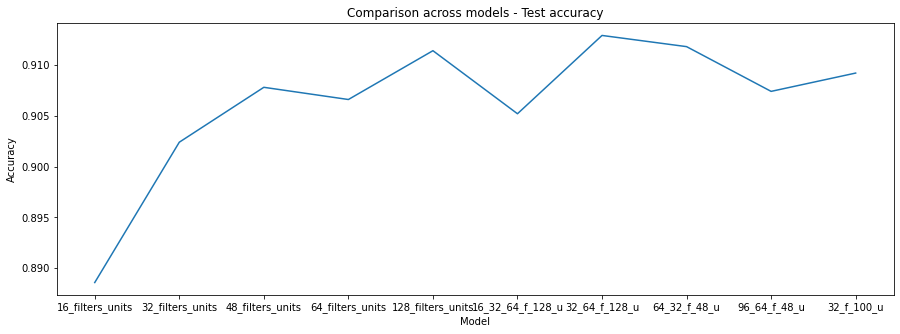

In [64]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(x_Ax, test_accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison across models - Test accuracy')
plt.show()

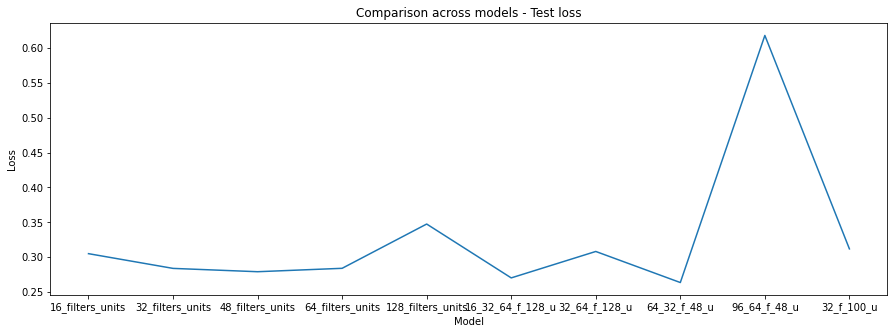

In [65]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(x_Ax, test_loss)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Comparison across models - Test loss')
plt.show()